In [4]:
import nbsetup
import numpy as np
import scipy as sp
import seaborn as sns
import pandas as pd
import ergodicpy as ep

In [10]:
def continous_entropy(samples):
    data = []
    x = range(2,20)
    for b in x:
        bins = np.linspace(samples.min(), samples.max(), b+1)
        pk, _ = np.histogram(samples, bins)
        dist = ep.shannon_entropy(pk)
        logdist = ep.shannon_entropy(np.ones(b)/b)
        logb = np.log(b)
        cont = ep.shannon_entropy(pk, continuous=True)
        
        data.append({
            'bins': b,
            'dist': dist,
            #'logdist': logdist,
            'logb': logb,
            #'minus': 1-(logb-dist),
            'rel': dist-logb,
            #'ratio': (dist/logb),
            'cont': cont,
        })
    df = pd.DataFrame(data=data)
    for key in data[0].keys():
        if key != 'bins':
            g = sns.lineplot(data=df, x='bins', y=key, label=key)
    g.set(ylim=(0, None))
    return df

# Continuous for various bins

,bins,dist,logb,rel,cont
0,2,0.693143,0.693147,-0.000005,0.999995
1,3,0.662737,1.098612,-0.435875,0.564125
2,4,0.931481,1.386294,-0.454814,0.545186
3,5,1.105805,1.609438,-0.503633,0.496367
4,6,1.258062,1.791759,-0.533697,0.466303
5,7,1.401532,1.945910,-0.544378,0.455622
6,8,1.525147,2.079442,-0.554294,0.445706
7,9,1.633624,2.197225,-0.563600,0.436400
8,10,1.736762,2.302585,-0.565823,0.434177
9,11,1.826224,2.397895,-0.571671,0.428329


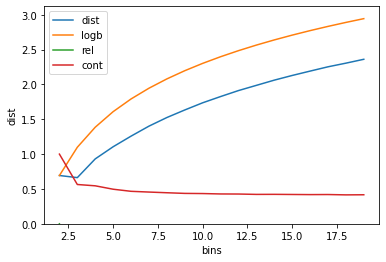

In [11]:
continous_entropy(np.random.normal(5,2,10000))

,bins,dist,logb,rel,cont
0,2,0.644040,0.693147,-0.049108,0.950892
1,3,0.646815,1.098612,-0.451797,0.548203
2,4,0.886214,1.386294,-0.500080,0.499920
3,5,1.058362,1.609438,-0.551076,0.448924
4,6,1.217330,1.791759,-0.574430,0.425570
5,7,1.348430,1.945910,-0.597480,0.402520
6,8,1.480189,2.079442,-0.599252,0.400748
7,9,1.584514,2.197225,-0.612710,0.387290
8,10,1.684390,2.302585,-0.618195,0.381805
9,11,1.773595,2.397895,-0.624300,0.375700


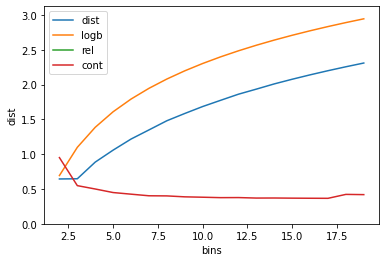

In [12]:
continous_entropy(np.random.normal(2,2,10000))

,bins,dist,logb,rel,cont
0,2,0.557898,0.693147,-0.135249,0.864751
1,3,0.935476,1.098612,-0.163137,0.836863
2,4,1.213370,1.386294,-0.172924,0.827076
3,5,1.428835,1.609438,-0.180603,0.819397
4,6,1.608064,1.791759,-0.183695,0.816305
5,7,1.760390,1.945910,-0.185520,0.814480
6,8,1.893125,2.079442,-0.186316,0.813684
7,9,2.008242,2.197225,-0.188983,0.811017
8,10,2.113017,2.302585,-0.189568,0.810432
9,11,2.206945,2.397895,-0.190950,0.809050


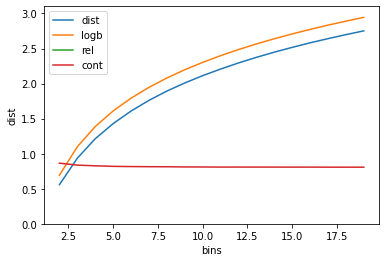

In [13]:
continous_entropy(np.random.power(2,10000))

,bins,dist,logb,rel,cont
0,2,0.042696,0.693147,-0.650451,0.349549
1,3,0.189323,1.098612,-0.909289,0.090711
2,4,0.354432,1.386294,-1.031863,-0.031863
3,5,0.515110,1.609438,-1.094328,-0.094328
4,6,0.665910,1.791759,-1.125850,-0.125850
5,7,0.799817,1.945910,-1.146093,-0.146093
6,8,0.914835,2.079442,-1.164606,-0.031075
7,9,1.022993,2.197225,-1.174231,-0.056448
8,10,1.124579,2.302585,-1.178006,-0.072645
9,11,1.215829,2.397895,-1.182067,-0.086756


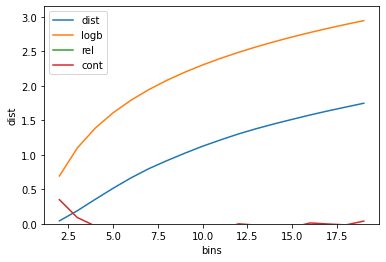

In [14]:
continous_entropy(np.random.power(20,10000))

,bins,dist,logb,rel,cont
0,2,0.693075,0.693147,-0.000072,0.999928
1,3,1.098596,1.098612,-0.000017,0.999983
2,4,1.385869,1.386294,-0.000425,0.999575
3,5,1.608791,1.609438,-0.000647,0.999353
4,6,1.791080,1.791759,-0.000679,0.999321
5,7,1.945288,1.945910,-0.000622,0.999378
6,8,2.078597,2.079442,-0.000844,0.999156
7,9,2.196443,2.197225,-0.000781,0.999219
8,10,2.301669,2.302585,-0.000916,0.999084
9,11,2.396806,2.397895,-0.001089,0.998911


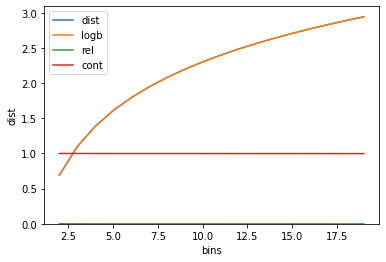

In [15]:
continous_entropy(np.random.uniform(2,10,10000))

# Complexity check

In [16]:
def ergodic_generate(func, obs, ensembles):
    samples = [func(obs) for _ in ensembles]
    return ep.ErgodicEnsemble(obs=obs, continuous=True)

In [17]:
ee = ergodic_generate()

TypeError: ergodic_generate() missing 3 required positional arguments: 'func', 'obs', and 'ensembles'